<a href="https://colab.research.google.com/github/amnnsharma/GlidePro/blob/main/Dynacard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from scipy.interpolate import interp1d

def fit_curve(x_data, y_data, kind='cubic'):
    interpolated_function = interp1d(x_data, y_data, kind=kind, fill_value="extrapolate")
    return interpolated_function

In [2]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Path to your Excel file in Google Drive
file_path = '/content/drive/My Drive/deviation_data.xlsx'

# Load Excel file into a DataFrame
df = pd.read_excel(file_path)

# Display the loaded DataFrame
df.columns=['SN', 'MD', 'Inclination', 'Azimuth']
df=df.drop(columns=['SN'])
md=df['MD'].astype(float).tolist()
inclination=df['Inclination'].astype(float).tolist()
azimuth=df['Azimuth'].astype(float).tolist()
#print(df)

In [4]:
import numpy as np
import math

T_s=[]

for i in range(len(md)):
  T_s.append(np.array([math.sin(math.radians(inclination[i]))*math.cos(math.radians(azimuth[i])),
                       math.sin(math.radians(inclination[i]))*math.sin(math.radians(azimuth[i])),
                       math.cos(math.radians(inclination[i]))]))


In [5]:
gamma=[]
rc=[]
B_s=[]

for i in range(len(md)-1):
  if T_s[i+1][0]!=T_s[i][0] and T_s[i+1][1]!=T_s[i][1] and T_s[i+1][2]!=T_s[i][2]:
    gamma_i=math.acos(np.dot(T_s[i], T_s[i+1]))
    gamma.append(gamma_i)
    rc.append((md[i+1]-md[i])/gamma_i)
  else:
    gamma.append(0)
    rc.append(np.inf)

  B_s.append(np.cross(T_s[i], T_s[i+1]))


N_s=[]

for i in range(len(md)-1):
  if T_s[i][1]==0:
    N_s.append(np.array([0, 1, 0]))
  else:
    f=(1+(T_s[i][0]/T_s[i][1])**2)**0.5
    N_s.append(np.array([1/f, -T_s[i][0]/T_s[i][1]/f, 0]))

g=np.array([0, 0, -9.81])

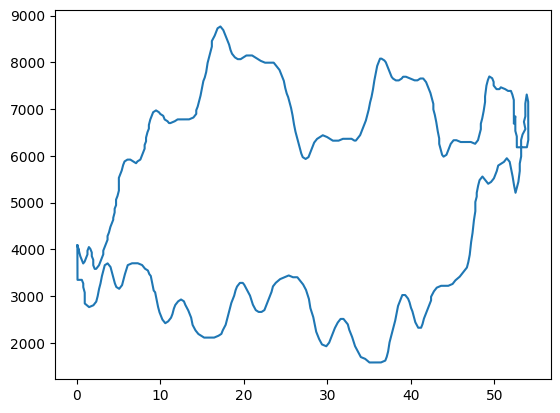

In [25]:
import scipy.io

# Load .mat file
mat_data = scipy.io.loadmat('/content/drive/My Drive/dyna_data.mat')

for key, value in mat_data.items():
    #print(type(key))
    if isinstance(value, np.ndarray):
      if key=='F':
        F=np.ravel(value)
      if key=='X':
        u=np.ravel(value)
      #print(key)
      #print(value)
      #dyna_readings[value]=key

data_points=len(F)
F=np.append(F, F[:2])
u=np.append(u, u[:2])

import matplotlib.pyplot as plt
plt.plot(u,F)

In [30]:
df_dt=[]

dt=30/data_points

for i in range(data_points+1):
  df_dt.append((F[i+1]-F[i])/dt)

d2f_dt2=[]

for i in range(data_points):
  d2f_dt2.append((F[i+1]-F[i])/dt)

df_dt=df_dt[:-1]

456